# PT Symmetric Study of Ising Model

Consider two spin lattices $A,\ B$ which are coupled along their faces.

The Hamiltonian for lattice $A$ is:

$H_A = \frac{-J}{2}\sum_{\langle i, j \rangle}^{N} \sigma_i \sigma_j + \mu_A \sum_{j=1}^N \sigma_i$

where $\mu_A = $1e-6.

The Hamiltonian for lattice $B$ is:

$H_B = \frac{-J}{2}\sum_{\langle i, j \rangle}^{N} \sigma_i \sigma_j + \mu_B \sum_{j=1}^N \sigma_i$

where $\mu_B = -\mu_A = $-1e-6

In [1]:
import sys
print(sys.path)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import trange
from utils.MCIM import spinVis3D
from utils.MCIM import spinLattice
from utils.MCIM import metropolisAlgorithm
import params as p


['/Users/ashley/PycharmProjects/MCIMS', '/Users/ashley/PycharmProjects/MCIMS', '/Users/ashley/PycharmProjects/MCIMS/utils', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/ashley/PycharmProjects/MCIMS/venv/lib/python3.7/site-packages', '/Users/ashley/PycharmProjects/MCIMS/venv/lib/python3.7/site-packages/IPython/extensions', '/Users/ashley/.ipython']


Declare Variables:

In [2]:
beta_array = np.linspace(p.T_MIN, p.T_MAX, p.numTemp, endpoint=True)
# Output parameters
d = {'beta': beta_array}
dataset = pd.DataFrame(data=d)

# Initialize main variables
spins = spinLattice(p.M, p.N, p.J, p.mu, 'oop')
params = metropolisAlgorithm(p.BURN_IN, p.STEPS, beta_array)


Define coupling J matrix

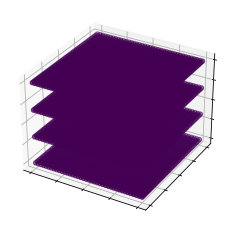

<Figure size 432x288 with 0 Axes>

In [3]:
J_matrix = spins.initJmatrix()
spinVis3D(J_matrix, 'J_matrix.png')


Define field $\mu$ matrix

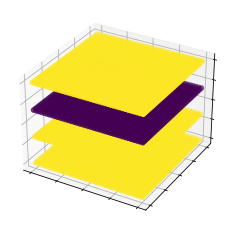

<Figure size 432x288 with 0 Axes>

In [4]:
mu_matrix = spins.initFieldmatrix()
spinVis3D(mu_matrix, 'mu_matrix.png')


Initialize lattice configuration

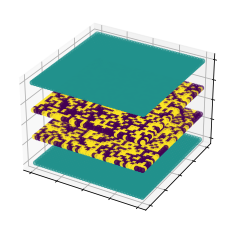

100%|██████████| 1/1 [03:10<00:00, 190.92s/it]


<Figure size 432x288 with 0 Axes>

In [5]:
nHS_A_tmp = np.zeros((p.STEPS, len(beta_array)))
nHS_B_tmp = np.zeros((p.STEPS, len(beta_array)))

t = time.time()

L = spins.initPlaneCoupledLattice()
spinVis3D(L, 'OG_spins_oop.png')

for i in trange(p.numTrials):
    df, L, nHS_A_tmp, nHS_B_tmp = \
        params.anneal(spins, L, J_matrix, mu_matrix, nHS_A_tmp, nHS_B_tmp, i)

    dataset = pd.concat([dataset, df], axis=1)



Show separate lattices:

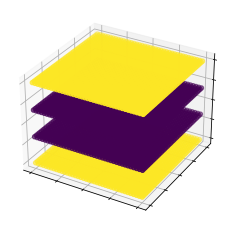

<Figure size 432x288 with 0 Axes>

In [6]:
spinVis3D(L, 'spinsFinal_'+str(i)+'.png')

In [7]:
elapsed = time.time()
print(elapsed)

dataset.to_csv('data.csv', index=False)

1624993766.217386


[Text(0.5, 0, 'Time (MC Steps)'),
 Text(0, 0.5, '$n_{HS}$'),
 Text(0.5, 1.0, '$n_{HS}$ Coupling vs Time')]

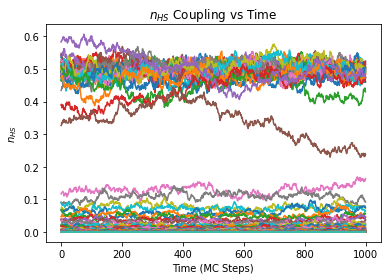

In [8]:
fig, ax = plt.subplots()
for col in range(nHS_A_tmp.shape[1]):
    ax.plot(nHS_A_tmp[:, col])

ax.set(xlabel=r'Time (MC Steps)', ylabel=r'$n_{HS}$',
       title=r'$n_{HS}$ Coupling vs Time')

Plot molar HS fraction vs temperature

In [9]:
nHS_A_col = [col for col in dataset if col.startswith('nHS_A')]
nHS_B_col = [col for col in dataset if col.startswith('nHS_B')]

nHS_A = dataset[nHS_A_col]
nHS_B = dataset[nHS_B_col]

In [10]:
nHS_A.to_numpy()
nHS_B.to_numpy()

nHS_A_mean = np.mean(nHS_A, axis=1)
nHS_B_mean = np.mean(nHS_B, axis=1)

nHS_A_stdDev = np.std(nHS_A, axis=1)
nHS_B_stdDev = np.std(nHS_B, axis=1)

nHS_A_min = np.amin(nHS_A, axis=1)
nHS_B_min = np.amin(nHS_B, axis=1)

nHS_A_max = np.amax(nHS_A, axis=1)
nHS_B_max = np.amax(nHS_B, axis=1)

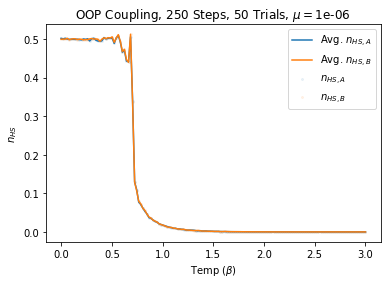

In [11]:
fig, ax = plt.subplots()
# ax.set(xlabel=r'Temp ($\beta$)', ylabel=r'$n_{HS}$',
#        title=r'$n_{HS}\ vs\ Temp$')

ax.set(xlabel=r'Temp ($\beta$)', ylabel=r'$n_{HS}$',
       title=r'OOP Coupling, 250 Steps, 50 Trials, $\mu=$'+str(p.mu))

for columnA in nHS_A:
    tmpA = ax.scatter(dataset['beta']/p.T_C, nHS_A[columnA], s=4, c='C0', label='$n_{HS,A}$', alpha=0.08)
for column in nHS_B:
    tmpB = ax.scatter(dataset['beta']/p.T_C, nHS_B[column], s=4, c='C1', label='$n_{HS,B}$', alpha=0.08)
meanA, = ax.plot(dataset['beta']/p.T_C, nHS_A_mean, label='mean A')
meanB, = ax.plot(dataset['beta']/p.T_C, nHS_B_mean, label='mean B')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[meanA, meanB, tmpA, tmpB],labels=['Avg. $n_{HS,A}$','Avg. $n_{HS,B}$','$n_{HS,A}$', '$n_{HS,B}$'])

plt.savefig('nHS_v_Temp.png')





